In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


$$S_{t+h} = S_t + \sigma S_t h  + \sqrt{V_t} S_t \sqrt{h} Z^S_{t}$$
$$S_{t+h} = V_t +κ(θ - V_t) h + \xi \sqrt{V_t} \sqrt{h} Z^V_{t}$$
<br>

$$Z^V_{t} \sim \mathcal{N}(0, 1)$$
$$Z^S_{t} \sim \mathcal{N}(0, 1)$$
$$Cov(Z^V_{t},Z^S_{t}) = ρ$$
<br>
	$$\begin{bmatrix}
  Z^S_{t} \\
  Z^V_{t}
  \end{bmatrix} =\begin{pmatrix}
\begin{bmatrix}0 \\ 0
\end{bmatrix}, \begin{bmatrix}1 & \rho  \\ \rho & 1
\end{bmatrix}
\end{pmatrix} $$
<br>
$ \mu$ = drift
<br>
$θ = avg. var. $
<br>
$κ = rate of mean reversion$
<br>
$\xi$ = vol.


[[ 1.         -0.72589157]
 [-0.72589157  1.        ]]


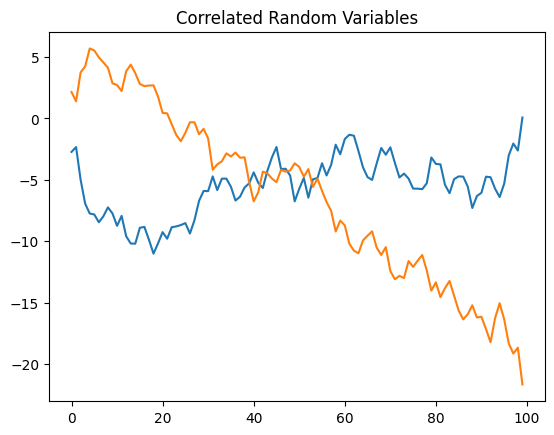

In [ ]:
rho = -0.7
number_of_iterations = 100
mu = np.array([0, 0])
covariance = np.array([[1, rho], [rho, 1]])
path = np.random.multivariate_normal(mu,covariance, number_of_iterations)
plt.plot(path.cumsum(axis=0));
plt.title('Correlated Random Variables')
print(np.corrcoef(path.T))

In [ ]:
def generate_heston_model(S, T, r, kappa, theta, V_0, rho, xi, steps, number_of_iterations):
  dt = T/steps
  size = (number_of_iterations, steps)
  prices = np.zeros(size)
  sigmas = np.zeros(size)
  S_t = S
  V_t = V_0
  covariance = np.array([[1, rho], [rho, 1]])

  for i in range(steps):
    W_t = np.random.multivariate_normal(np.array([0, 0]), covariance, size=number_of_iterations)

    S_t = S_t + r * S_t * dt + np.sqrt(V_t) * S_t * np.sqrt(dt) * W_t[:, 0]
    V_t = np.abs(V_t + kappa * (theta - V_t) * dt + xi * np.sqrt(V_t) * np.sqrt(dt) * W_t[:, 1])
    prices[:,i] = S_t
    sigmas[:,i] = V_t

  return prices, sigmas

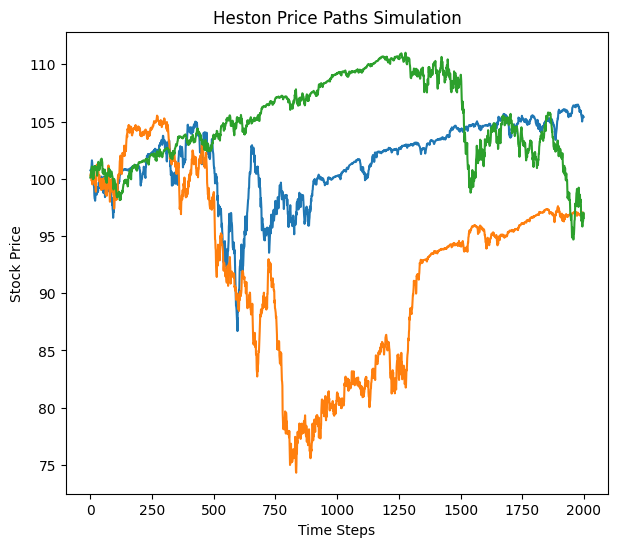

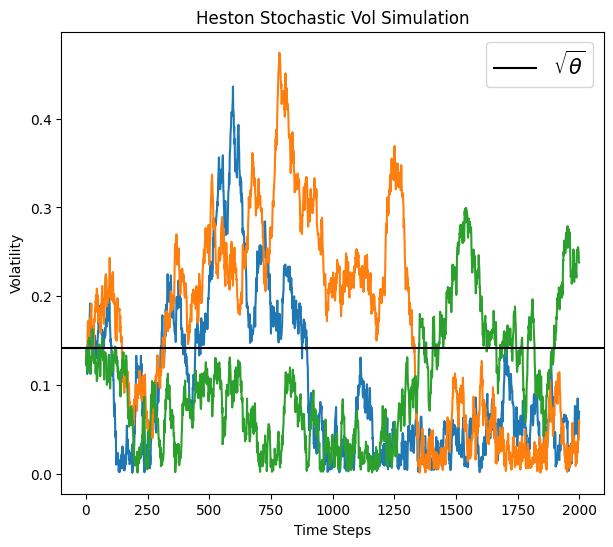

In [ ]:
kappa =4
theta = 0.02
V_0 =  0.02
xi = 0.9
r = 0.02
S = 100
paths =3
steps = 2000
T = 1
rho=-0.8
prices, sigmas = generate_heston_model(S, T, r, kappa, theta, V_0, rho, xi, steps, paths)

plt.figure(figsize=(7,6))
plt.plot(prices.T)
plt.title('Heston Price Paths Simulation')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.show()

plt.figure(figsize=(7,6))
plt.plot(np.sqrt(sigmas).T)
plt.axhline(np.sqrt(theta), color='black', label=r'$\sqrt{\theta}$')
plt.title('Heston Stochastic Vol Simulation')
plt.xlabel('Time Steps')
plt.ylabel('Volatility')
plt.legend(fontsize=15)
plt.show()

Pricing Options:
Code for BSE and imp_vol are from interim demo colab:

In [ ]:
def bse_analytical(sigma, r, T, K, S, option_type="call"):
  d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T) / (sigma*np.sqrt(T))
  d2 = d1 - sigma*np.sqrt(T)

  if option_type == "call":
    price = S * sp.stats.norm.cdf(d1) - K * np.exp(-r * T) * sp.stats.norm.cdf(d2)
  elif option_type == "put":
    price = K * np.exp(-r * T) * sp.stats.norm.cdf(-d2) - S * sp.stats.norm.cdf(-d1)
  print(price)
  return price

In [ ]:
def imp_vol( r, T, K, S, market_price, option_type="call" ):
  def objective_function(sigma):
    model_price = bse_analytical(sigma, r, T, K, S, option_type)
    return model_price - market_price
  implied_volatility = sp.optimize.brentq(objective_function,1e-5,5.0)
  print(f"Implied Vol {implied_volatility:.2%}")
  return implied_volatility

In [ ]:
kappa =4
theta = 0.02
V_0 =  0.02
xi = 0.9
r = 0.02
S = 100
paths =3
steps = 2000
T = 1
rho=-0.8
prices, sigmas  = generate_heston_model(S, T, r, kappa, theta,
                                    V_0, rho=-0.9, xi=xi, steps=steps, number_of_iterations=paths
                                    )